<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9d/KPMG_logo.svg" width=500>
</center>

# <center><font color = darkblue>KPMG Data Analysis Virtual Internship Project</font></center>

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">

# <font color = navy>Introduction:</font>

<b>Sprocket Central pvt. ltd. </b> is a client company for <b>KPMG AU</b> who provides their services to their customers and their products include bike hiring for various purposes and open to hiring for everyone belonging to every wealth segment.
They have provided me with a dataset of their customers and wanted to know insights and suggestions to enhance their business.<br>
<br>
In this virtual internship from <b>Forage</b> a few tasks were given such as the following:

#### Task 1: Data Quality Assessment
   - Assessment of data quality and completeness in preparation for analysis 
   
#### Task 2: Data Insights
   - pointing out all the necessary steps for our data analytics.
   
#### Task 3: Data Insights and Presentation
   - Using visualisations to present insights

#### Task 4: Perform Business Analysis
   - Perform clustering or other necessary techniques required for 'customer segmentation' and gain more insights 
    
#### Task 5: Device Business Strategies

<br>

In this project I have performed Data cleaning techniques , Exploratory Data analysis to gain some basic insights ,Performed Data Visualizations for representations of the features, then prepared the dataset for K means clustering and RFM Analysis for proper customer segmentation.

<br> 

The results were such that 4 segments of customers were formed namely: "Best Customers","High Spending Customers","Low Spending Active Loyal Customers","Churned Best Customers". Business strategies were given separately for each group so that effective marketing can be done and customer conversion rate can be increased and in return the total revenue can increase.
    
</div>   

<div class="alert alert-block alert-warning">
    
## Customer Segmentation:
#### Objective: 
  - Identify different customer segments based on their characteristics and behaviors to tailor marketing strategies and improve customer experience. <br>

#### Business Rationale: 
  - Understanding customer segments can help the company target specific groups with personalized promotions, offers, and services.
</div>

In [120]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns 
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('max_columns',100)

In [121]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
}

sns.set(rc=rc)


file = 'C:/Users/Bidee/Downloads/KPMG_VI_New_raw_data_update_final1.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [122]:
# read Excel files
df_trxn = data.parse('Transactions',skiprows = 1)
df_demo = data.parse('CustomerDemographic',skiprows = 1)
df_Address = data.parse('CustomerAddress',skiprows = 1)
df_cust_list = data.parse('NewCustomerList',skiprows = 1)

<div class="alert alert-block alert-info">

### Importing the 1st dataset "Customer Transaction" for preprocessing and EDA 🕵️
    
</div>    

In [123]:
df_trxn.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
12125,12126,88,2432,2017-02-01,1.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,2005-05-10
11358,11359,80,695,2017-12-14,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18
13126,13127,64,1363,2017-07-10,0.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18
10348,10349,78,3149,2017-09-08,0.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-25
12876,12877,95,3232,2017-07-05,1.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,2003-09-10


<div class="alert alert-block alert-info">
    
### Feature Understanding: 🔎
<b>"online_order"</b> - <I>Consists of 0 and 1 denoting No or yes respectively for online order or not.</I> <br>
<b>"product_line","product_class" & "product_size"</b> - <I>These are product classification and segregation.</I> <br>
Rest of the features are self explanatory
</div>   

In [124]:
df_trxn.describe(include = 'all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,100
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,1992-10-02 00:00:00
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,234
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-21 00:00:00
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-06 00:00:00
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,NaN
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,NaN
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,NaN
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,NaN


In [125]:
# looking for missing values. As these won't be significant so we can drop them.
df_trxn.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [126]:
df_tr = df_trxn.dropna()

In [127]:
df_tr.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [128]:
# Now the dataset is cleaned, checking info 
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

#### Let's Start exploring the dataset with some EDA

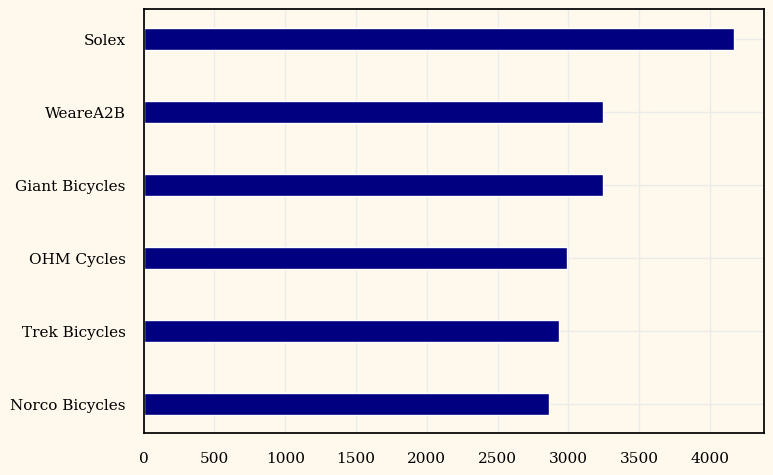

In [129]:
df_b = df_tr['brand'].value_counts().sort_values()
df_b.plot.barh(width = 0.3, color = 'navy')
plt.show()

In [130]:
df_tr.groupby('brand')['list_price'].mean().sort_values()

brand
Norco Bicycles     913.015830
OHM Cycles         980.625573
Solex             1055.060134
Trek Bicycles     1185.523374
Giant Bicycles    1235.269547
WeareA2B          1264.303834
Name: list_price, dtype: float64

In [131]:
#fig,ax = plt.subplots()
#fig.set_size_inches(15,8)
#ax = sns.stripplot(x=df_tr['list_price'],y=df_tr['brand'],data = df_tr , jitter=True , linewidth = 1)
#ax.set_title('Brand and its Pricing')


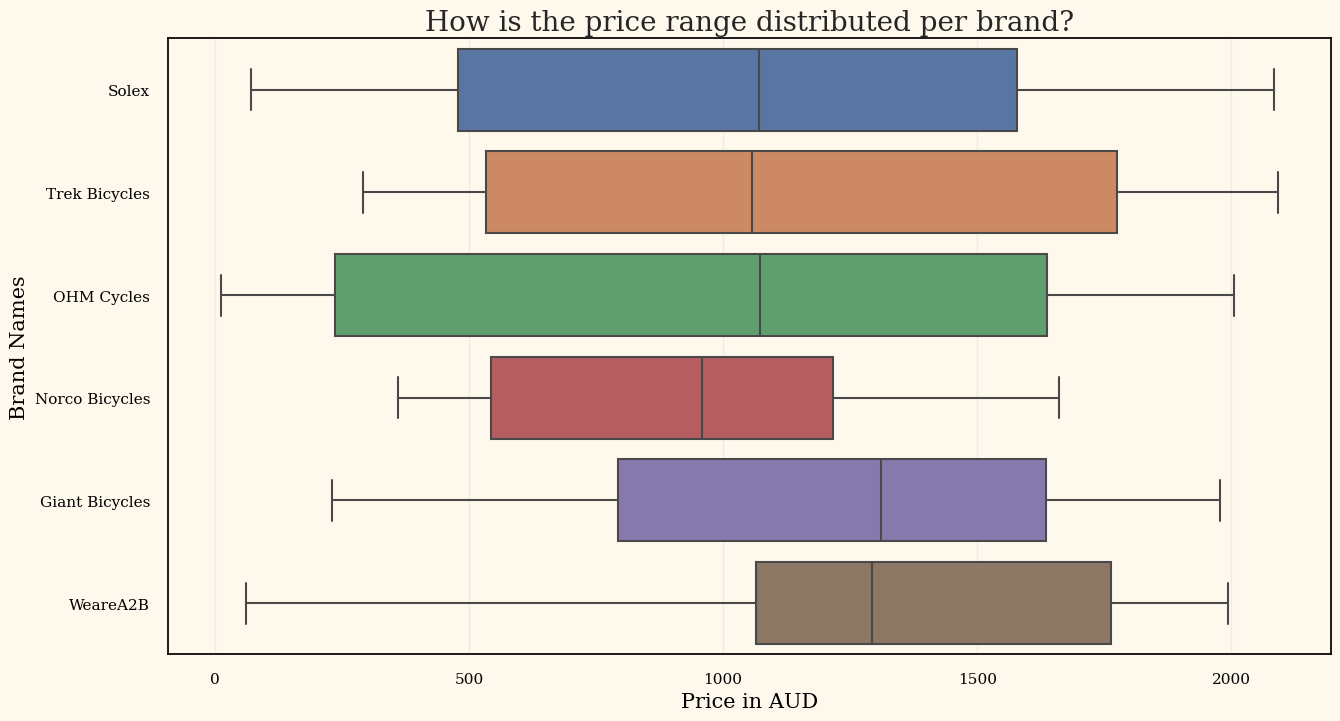

In [132]:
fig,ax1 = plt.subplots()
fig.set_size_inches(15,8)
ax1 = sns.boxplot(x=df_tr['list_price'],y=df_tr['brand'],data = df_tr )
ax1.set_title('How is the price range distributed per brand?', fontsize = 20)
ax1.set_xlabel('Price in AUD',fontsize = 15)
ax1.set_ylabel('Brand Names',fontsize = 15)
plt.show()

<div class="alert alert-block alert-info">

From the boxplot it can be observed that , OHM cycles covers bikes with a wide price range from as low as 12 Dollars to as high as 2000 Dollars but even if it has cheaper options which are helpful for people who want to spend less , Solex is more preferred as we have seen from the bar graph whereas OHM Cycles comes 4th in the list.
    
</div>

### Product wise distribution of price along with average, median, min and max values per product

In [133]:
df = df_tr[['brand','product_line','product_class','product_size','list_price']].\
        groupby(['brand','product_line','product_class'])['list_price'].agg([min,np.mean,np.median,max])

cm = sns.light_palette("royalblue", as_cmap=True)
df.style.background_gradient(cmap=cm).set_precision(3)

In [134]:
df_tr['online_order'].value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

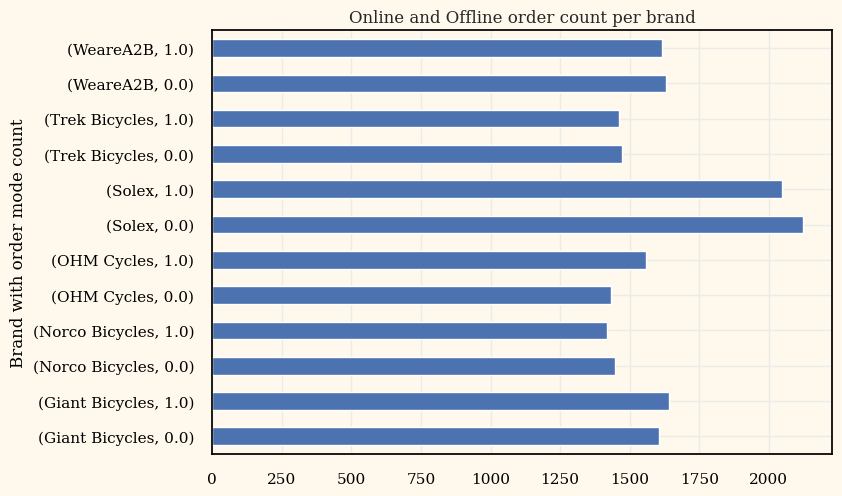

In [135]:
df_tr[['brand','online_order']].groupby(['brand','online_order']).value_counts().plot(kind = 'barh', title = 'Online and Offline order count per brand')
plt.ylabel('Brand with order mode count', fontsize = 12)
plt.show()

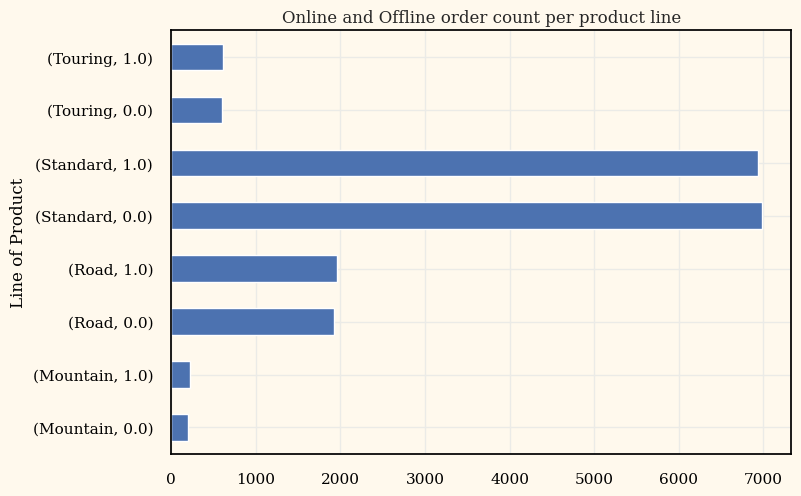

In [136]:
df_tr[['product_line','online_order']].groupby(['product_line','online_order']).value_counts()\
.plot(kind = 'barh', title = 'Online and Offline order count per product line')
plt.ylabel('Line of Product')
plt.show()

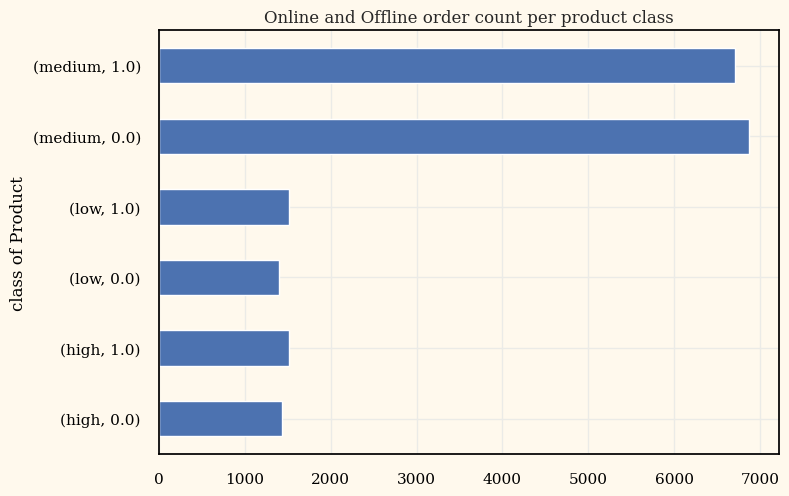

In [137]:
df_tr[['product_class','online_order']].groupby(['product_class','online_order']).value_counts()\
.plot(kind = 'barh', title = 'Online and Offline order count per product class')
plt.ylabel('class of Product')
plt.show()

<div class="alert alert-block alert-info">
The above 3 graphs are focused on mode of order i.e., Online for 1 & offline for 0 , across various product classes and brands. <br>
    
 - Solex has the highest popularity in terms of preferred brand , even though offline orders are highest for Solex individually as well as across brands. We have seen previously that OHM Cycles have cheaper ranges which isn't something Solex offers , but even with that fact OHM Cycles doesn't come into the picture for top 3 preferred brands. Top 3 popular brands are Solex, Giant Bicycles followed by WeareA2B, all 3 of them has stong offline and online purchasing customer base.
 - Now Given all the brands and range of products they offer , the "Standard" version or line of product is mainly preferred and is purchased though both online and offline modes almost equally.
 - In a similar way across all brands "Medium" class of the product is preferred.
</div>

<AxesSubplot:>

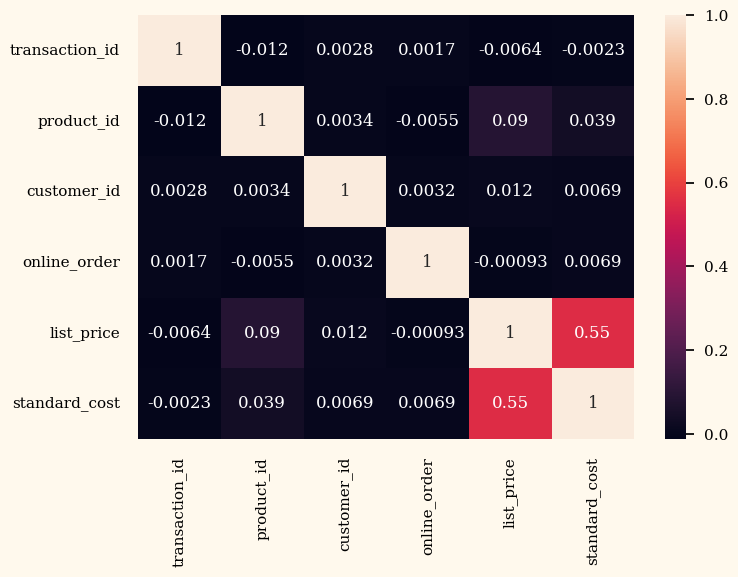

In [138]:
# there exists no correlation
df_corr = df_tr[['transaction_id','product_id','customer_id','transaction_date','online_order','order_status','brand','product_line','product_class','product_size','list_price','standard_cost']].corr()
sns.heatmap(df_corr,annot = True)

<div class="alert alert-block alert-info">

### Importing the 2nd dataset "Customer Demographics" for preprocessing and EDA 🕵️
    
</div>    

In [139]:
#now let's look at the other dataset df_demo 
df_demo.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3433,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
1465,1467,Alysia,Cantrill,Female,1,1975-12-16,NaN,Manufacturing,Mass Customer,N,â,Yes,6.0
3937,3939,Georges,Dumbelton,Male,67,1981-06-25,NaN,Manufacturing,Affluent Customer,N,âââ,No,15.0
916,918,Mahmud,Chiles,Male,73,1975-02-26,Internal Auditor,Health,High Net Worth,N,"×Ö¼Ö°×¨Öµ××©×Ö´××ª, ×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××, ×Ö...",No,13.0
714,716,Trescha,Preshous,Female,31,1979-11-09,Social Worker,Health,Mass Customer,N,Â¸ËÃâÄ±ËÃÂ¯ËÂ¿,No,11.0


In [140]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3343 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  default     

<div class="alert alert-block alert-info">
From this datset we are going to drop 'default' column as it contains garbage values, we're going to drop the null values<br>
and create a new cloumn 'age' instead of DOB
 </div>

In [141]:
df_demo.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                301
owns_car                                 0
tenure                                  87
dtype: int64

In [142]:
df_d = df_demo.dropna()

In [143]:
df_d.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
dtype: int64

In [144]:
df_d.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
98,100,Tripp,Steed,Male,80,1968-05-11,General Manager,Financial Services,Mass Customer,N,ð¾ ð ð ð ð ð ð ð§,Yes,4.0
2391,2393,Dorian,Colledge,Female,68,1981-06-21,Registered Nurse,Health,High Net Worth,N,"""'",Yes,11.0
407,409,Tatiania,O'Kane,Female,84,1978-01-23,Executive Secretary,Health,Mass Customer,N,Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌ...,Yes,13.0
1298,1300,Sisely,Strelitzer,Female,0,1991-03-10,Physical Therapy Assistant,Financial Services,Affluent Customer,N,Ã¥ÃâÆÂ©ËâËÂ¬â¦Ã¦,Yes,9.0
2214,2216,Clarinda,Woffinden,Female,29,1962-01-02,Systems Administrator II,Property,High Net Worth,N,0,Yes,10.0


In [145]:
df_d = df_d.drop(labels = 'default',axis = 1)

In [146]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3995
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  owns_car    

In [147]:
# Removing DOB and creating age column as that would be more useful.
import datetime as dt

today = dt.date.today()
age = today.year - df_d.DOB.dt.year

df_d['age'] = age
df_d = df_d.drop(labels = 'DOB',axis = 1)

In [148]:
df_d.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
2047,2049,Jud,Purchon,Male,21,Assistant Professor,Manufacturing,High Net Worth,N,No,5.0,61
2061,2063,Benny,Crudge,Male,55,Clinical Specialist,Health,Affluent Customer,N,No,16.0,60
1746,1748,Skell,Oxenden,Male,83,Recruiter,Manufacturing,Mass Customer,N,Yes,10.0,67
1840,1842,Ephrayim,Beville,Male,89,Accountant IV,Financial Services,Mass Customer,N,No,8.0,46
163,165,Aldon,Roelofs,Male,61,Administrative Officer,Argiculture,Mass Customer,N,Yes,12.0,39


In [149]:
df_d.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

In [150]:
# renaming columns 
df_d = df_d.rename(columns={'past_3_years_bike_related_purchases':'rents','job_industry_category':'job_category'})
# reordering columns
df_d = df_d[['customer_id', 'first_name', 'last_name', 'gender', 'age',
       'rents', 'job_title',
       'job_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure']].copy()
df_d.sample()

,customer_id,first_name,last_name,gender,age,rents,job_title,job_category,wealth_segment,deceased_indicator,owns_car,tenure
542,544,Giacomo,Johanning,Male,33,51,Structural Engineer,Manufacturing,High Net Worth,N,Yes,5.0


In [151]:
df_d.describe(include = 'all')

,customer_id,first_name,last_name,gender,age,rents,job_title,job_category,wealth_segment,deceased_indicator,owns_car,tenure
count,2630.000000,2630,2630,2630,2630.000000,2630.000000,2630,2630,2630,2630,2630,2630.000000
unique,NaN,2234,2560,4,NaN,NaN,195,9,3,2,2,NaN
top,NaN,Tobe,Robelin,Female,NaN,NaN,Social Worker,Manufacturing,Mass Customer,N,Yes,NaN
freq,NaN,5,2,1366,NaN,NaN,38,635,1300,2628,1361,NaN
mean,1950.951331,NaN,NaN,NaN,45.758935,49.363498,NaN,NaN,NaN,NaN,NaN,10.671483
std,1149.006681,NaN,NaN,NaN,12.494794,28.841657,NaN,NaN,NaN,NaN,NaN,5.676862
min,1.000000,NaN,NaN,NaN,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,958.500000,NaN,NaN,NaN,36.000000,25.000000,NaN,NaN,NaN,NaN,NaN,6.000000
50%,1936.500000,NaN,NaN,NaN,46.000000,48.500000,NaN,NaN,NaN,NaN,NaN,10.000000
75%,2932.750000,NaN,NaN,NaN,55.000000,74.000000,NaN,NaN,NaN,NaN,NaN,16.000000


<div class="alert alert-block alert-info">
It is seen that mostly adults are using the bike renting company. Average age of the renter is around 45 years old <br>
and 75% of the users are below 60 years of age.
</div>

In [152]:
df_d['gender'].value_counts()

Female    1366
Male      1262
F            1
Femal        1
Name: gender, dtype: int64

In [153]:
df_d['gender'] = df_d['gender'].str.replace('Female','F')
df_d['gender'] = df_d['gender'].str.replace('Femal','F')
df_d['gender'] = df_d['gender'].str.replace('Male','M')
df_d['gender'].value_counts()

F    1368
M    1262
Name: gender, dtype: int64

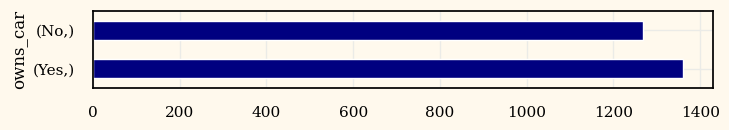

In [154]:
df_d[['owns_car']].value_counts().plot(kind = 'barh',figsize=(8,1),color = 'navy')
plt.show()

In [155]:
df_d.reset_index(inplace = True)


In [156]:
df_d[['wealth_segment','gender','rents','owns_car']].groupby(['gender','wealth_segment','owns_car']).count()

rents
gender wealth_segment    owns_car       
F      Affluent Customer No          145
                         Yes         171
       High Net Worth    No          173
                         Yes         186
       Mass Customer     No          336
                         Yes         357
M      Affluent Customer No          157
                         Yes         183
       High Net Worth    No          150
                         Yes         165
       Mass Customer     No          308
                         Yes         299

<div class="alert alert-block alert-info">

- Affluent customers are those who are brand oriented and tend to favour brands they like. 
- Mass customers are those who belong to middle to lower income groups basically majority of the population.
- As the name suggests High net worth people are high income group customers and as we can see here that segment of customer is   also very significant.

#### Majority of the customers belong to the Mass customer groups, also females are hiring more bikes than males

<b> Surprisingly customers who own a car are more in numbers for hiring bikes to work than customers with no car ownership </b>
</div>    

In [157]:
df_Address.sample(5)

,customer_id,address,postcode,state,country,property_valuation
2464,2469,49 Talmadge Trail,2036,NSW,Australia,11
2080,2085,73 Muir Trail,3196,VIC,Australia,7
1760,1765,10 Cambridge Street,4567,QLD,Australia,7
300,305,01459 Fremont Place,2747,NSW,Australia,4
3044,3049,529 Monterey Street,3338,VIC,Australia,3


<AxesSubplot:>

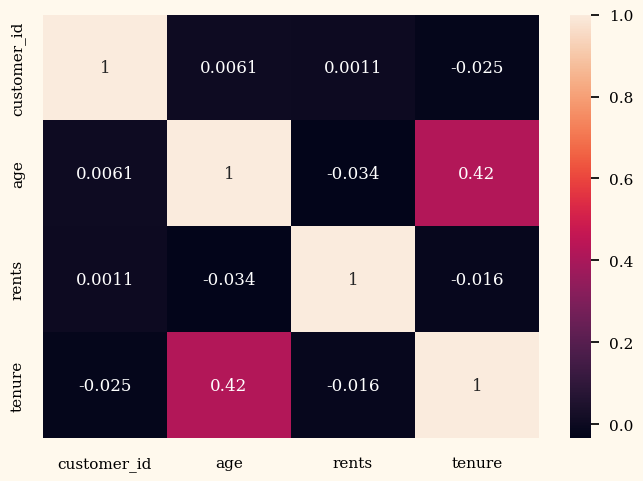

In [158]:
# Negligible Correlation
df_corr = df_d[['customer_id','gender','age','rents','job_title','job_category','wealth_segment','deceased_indicator','owns_car','tenure']].corr()
sns.heatmap(df_corr,annot = True)

<div class="alert alert-block alert-info">

## Merging the 2 Datasets and creating a new one so that we can get both purchases made and customer details
</div>

In [159]:

df = df_d.merge(df_tr, on = 'customer_id',how = 'left')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13283 entries, 0 to 13282
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    13283 non-null  int64         
 1   customer_id              13283 non-null  int64         
 2   first_name               13283 non-null  object        
 3   last_name                13283 non-null  object        
 4   gender                   13283 non-null  object        
 5   age                      13283 non-null  int64         
 6   rents                    13283 non-null  int64         
 7   job_title                13283 non-null  object        
 8   job_category             13283 non-null  object        
 9   wealth_segment           13283 non-null  object        
 10  deceased_indicator       13283 non-null  object        
 11  owns_car                 13283 non-null  object        
 12  tenure                   13283 n

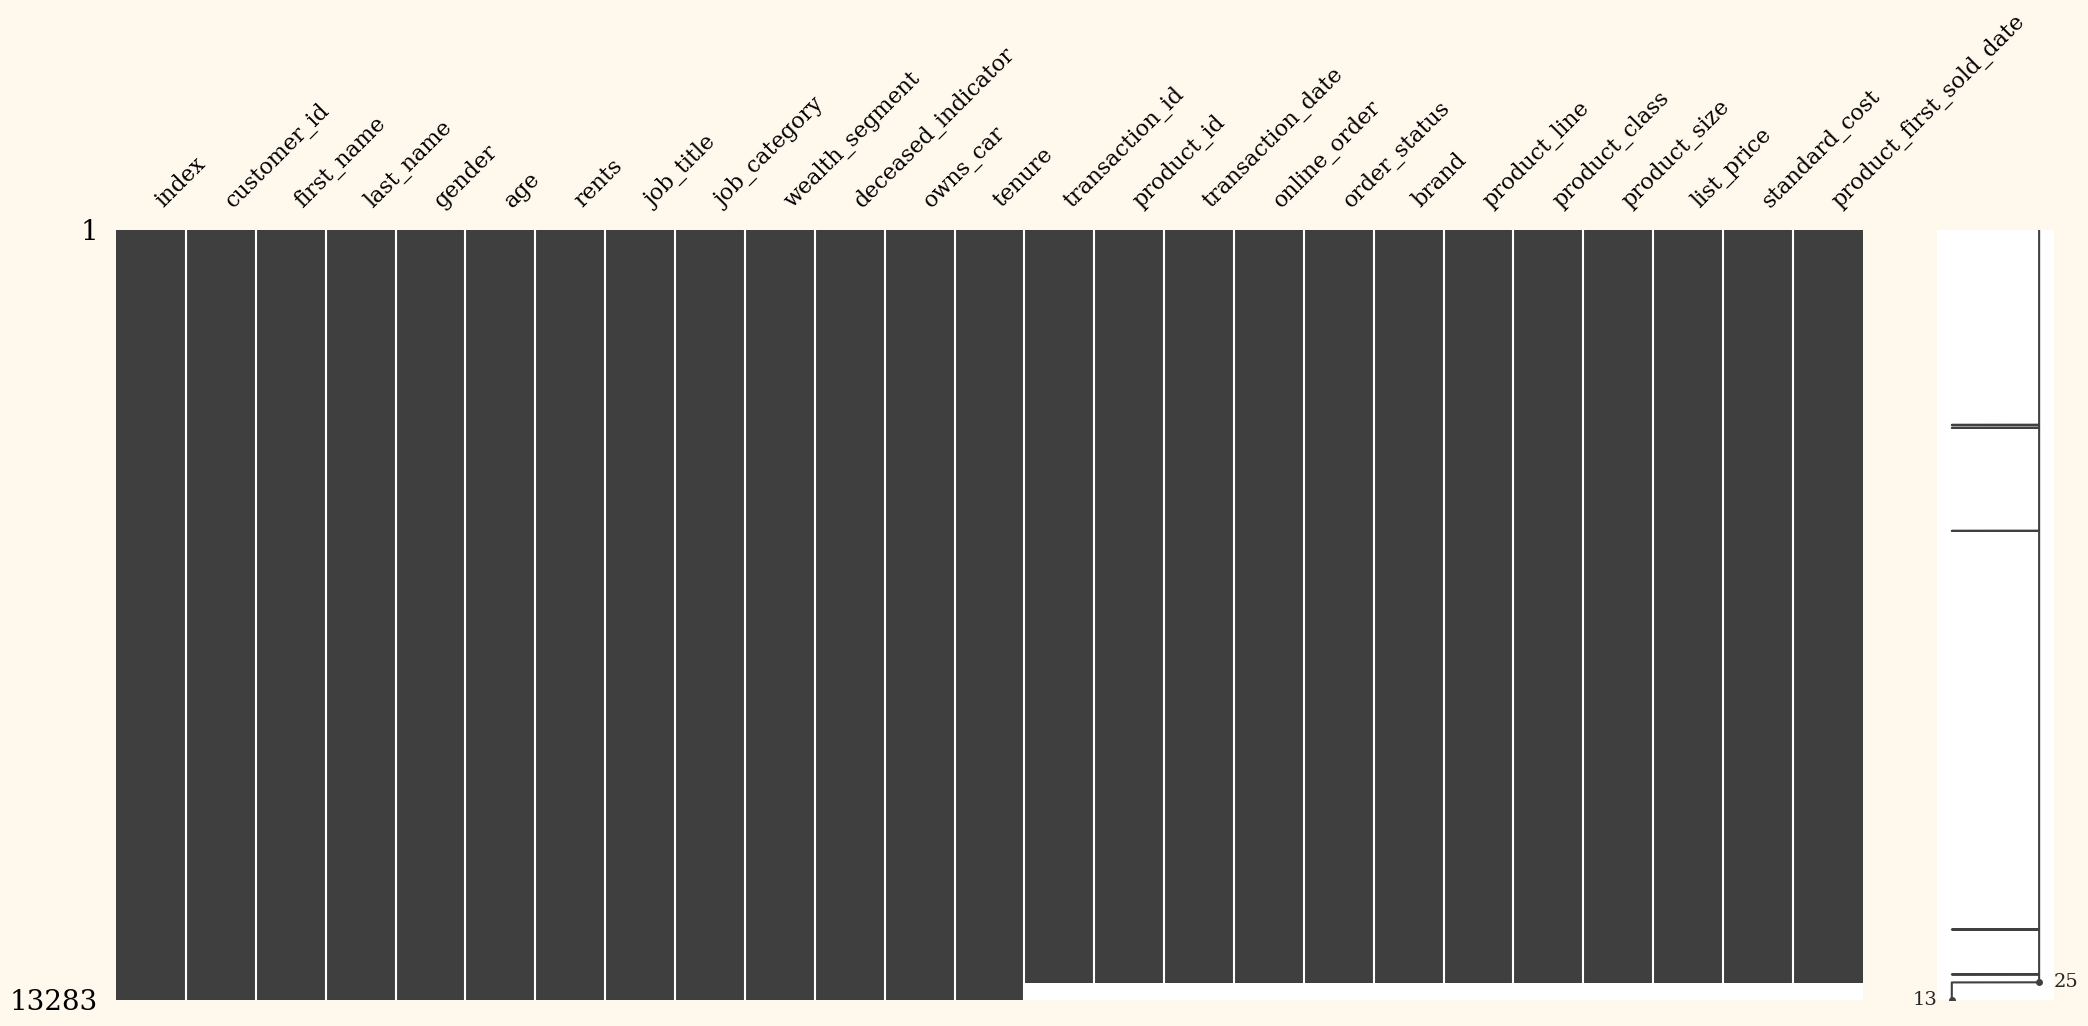

In [161]:
#visualizing missing values
import missingno as msno 
msno.matrix(df)
plt.show()

In [162]:
df.sample(5)

,index,customer_id,first_name,last_name,gender,age,rents,job_title,job_category,wealth_segment,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
602,143,145,Filippo,Ferrara,M,26,33,Account Executive,Financial Services,Mass Customer,...,2017-11-15,0.0,Approved,Giant Bicycles,Standard,medium,large,1812.75,582.48,2010-06-07
9792,2599,2601,Morgana,Wardel,F,48,48,Software Engineer III,Financial Services,Affluent Customer,...,2017-01-18,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2012-04-10
5097,1347,1349,Curran,Gush,M,26,83,Electrical Engineer,Manufacturing,Affluent Customer,...,2017-08-26,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,1991-11-07
9017,2378,2380,Merissa,Milella,F,67,44,Technical Writer,Retail,Mass Customer,...,2017-04-04,1.0,Approved,Trek Bicycles,Mountain,low,medium,574.64,459.71,2004-09-28
10421,2766,2768,Forest,Knowling,M,28,86,Executive Secretary,Manufacturing,Mass Customer,...,2017-11-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2011-03-16


<div class="alert alert-block alert-info">
    
From the default datasets , customer demographics and customer transactions, there are uncommon set of customers from both the
datasets. In other words , customer details are there for some customers but their transaction details are missing so we need to drop these extra customers and form our final dataframe before doing K-Means Clustering analysis.
    </div>

In [163]:
df.dropna(inplace = True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 12986
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    12982 non-null  int64         
 1   customer_id              12982 non-null  int64         
 2   first_name               12982 non-null  object        
 3   last_name                12982 non-null  object        
 4   gender                   12982 non-null  object        
 5   age                      12982 non-null  int64         
 6   rents                    12982 non-null  int64         
 7   job_title                12982 non-null  object        
 8   job_category             12982 non-null  object        
 9   wealth_segment           12982 non-null  object        
 10  deceased_indicator       12982 non-null  object        
 11  owns_car                 12982 non-null  object        
 12  tenure                   12982 n

In [165]:
df = df.drop(labels = 'index',axis = 1)

In [166]:
df.describe()

,customer_id,age,rents,tenure,transaction_id,product_id,online_order,list_price,standard_cost
count,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000,12982.000000
mean,1712.035896,45.821445,49.307041,10.746341,9986.959020,45.541288,0.498768,1109.095698,557.036749
std,1014.571863,12.518791,28.644970,5.668470,5759.529727,30.509321,0.500018,585.226849,409.303240
min,1.000000,21.000000,0.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000
25%,810.750000,36.000000,25.000000,6.000000,5028.000000,18.000000,0.000000,575.270000,215.140000
50%,1713.000000,46.000000,48.000000,11.000000,9970.500000,44.000000,0.000000,1163.890000,507.580000
75%,2579.000000,55.000000,73.000000,16.000000,14958.500000,72.000000,1.000000,1635.300000,795.100000
max,3497.000000,92.000000,99.000000,22.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000


<div class="alert alert-block alert-info">

# K Means Clustering:

<b>For customer segmentation we need to apply k means clustering to the data. 
K means algorithm is used for segmentation because it clusters based on similarities of the data points also making sure that different clusters are as distinct as possible.</b>
    
</div>    

In [167]:
# importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

<div class="alert alert-block alert-info">

<b>Using Elbow method to select the best possible value of K along with silhouette score which is a test statistic corresponding to every value of k. Selecting that value of k with the highest silhouette score is optimal. </b>
</div>    

In [168]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'age', 'rents',
       'job_title', 'job_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date'],
      dtype='object')

In [169]:
# Removing those columns which are not required for K means, thus reducing features.

df1 = df[['customer_id', 
            #'first_name', 'last_name', 
            #'gender',
         'age', 'rents',
       #'job_title', 'job_category',
         'wealth_segment', 
         #'deceased_indicator',
       'owns_car', 
         #'tenure', 'transaction_id', 'product_id',
       #'transaction_date',
            'online_order', 
         #'order_status',
         'brand',
       #'product_line', 'product_class', 'product_size',
         'list_price',
       #'standard_cost', 
            #'product_first_sold_date'
           ]].copy()

In [170]:
# Creating Dummy Variables.

df_km = pd.get_dummies(df1,drop_first = True)
df_km.head(5)

,customer_id,age,rents,online_order,list_price,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B
0,1,70,93,0.0,235.63,0,1,1,0,1,0,0,0
1,1,70,93,1.0,1577.53,0,1,1,0,0,1,0,0
2,1,70,93,1.0,1720.70,0,1,1,0,0,0,1,0
3,1,70,93,0.0,360.40,0,1,1,1,0,0,0,0
4,1,70,93,0.0,71.49,0,1,1,0,0,1,0,0


<div class="alert alert-block alert-info">

<b>Performing Hopkins test before performing K means clustering. <br>
If you're uncertain about the outcome of K means clustering then I would suggest before investing your multi-million dollar worth of time into clustering try this test , there are other tests as well, Hopkins test basically tell you about the nature of distribution of the dataset, whether its non uniform, spread out , or uniformly distributed. A Hopkins score of 0.5 or lesser is desired for k means to work , and if the score is below 0.25 then k means works the best in that scenario. </b>
    
</div>    

In [171]:
# Defining a function for calculating Hopkins Statistic.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [172]:
h = hopkins_statistic(df_km)
h

0.6043338495666598

<div class="alert alert-block alert-info">

### Our Hopkins test result is way above 0.5 as a result we can safely conclude that the dataset is uniformly distributed and hence  K means clustering is not a good option for these cases.

#### Still, let's try to fit K means algorithm to this data and see what is the result.
    
</div>    

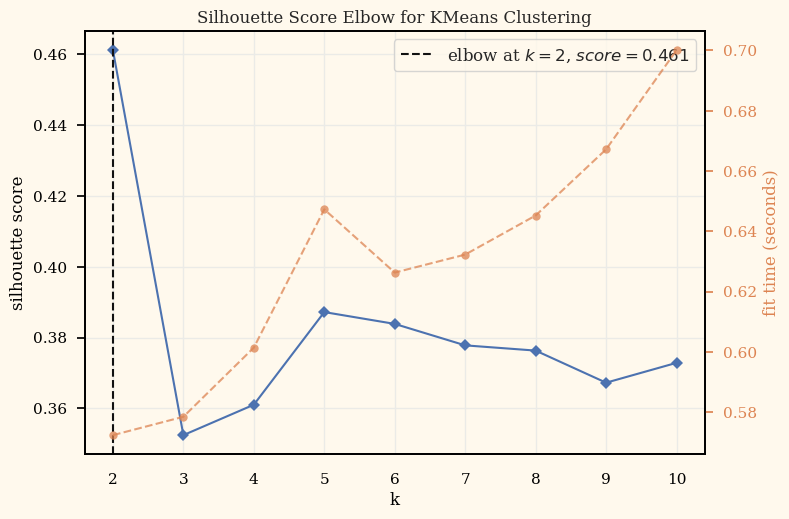

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [173]:
# This is the Silhouette score along with the elbow method.
model = KMeans(random_state = 0)
visualizer = KElbowVisualizer(model,metric = 'silhouette',timings = 'False')
visualizer.fit(df_km)
visualizer.poof()

<div class="alert alert-block alert-info">

#### Explanation: <br>
Silhouette score determines what your number of clusters 'k' should be. The higher the score the better it is and usually we take that value of K which is corresponding to highest score , as in our case there will be 2 clusters so k = 2 .
Computation time is also given here so the higher the number of clusters the more computationally extensive it becomes.
</div>    

In [174]:
kmeans = KMeans(n_clusters = 2,random_state = 0)
kmeans.fit(df_km)

KMeans(n_clusters=2, random_state=0)

In [175]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [176]:
from collections import Counter 

In [177]:
Counter(kmeans.labels_)

Counter({0: 6500, 1: 6482})

<div class="alert alert-block alert-info">
2 clusters are formed and points are equally distributed as we can see. Usually in 
K means all the clusters have almost the same number of points. Since in our case there are multiple features we can't
visualize the points. 
</div>

In [178]:
# just marking the labels
y = kmeans.predict(df_km)
df_km['labels'] = y
df_km.sample(5)

,customer_id,age,rents,online_order,list_price,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,labels
11835,3166,68,96,0.0,1198.46,0,1,0,1,0,0,0,0,1
2497,607,47,55,0.0,544.05,0,1,0,1,0,0,0,0,0
2211,531,30,94,1.0,230.91,1,0,0,0,0,0,0,0,0
103,29,55,62,0.0,1807.45,0,1,0,0,0,0,0,1,0
5025,1326,57,15,1.0,1945.43,0,0,1,0,0,1,0,0,0


<div class="alert alert-block alert-info">
</div>    

## Possible Explanation: 
Hopkins score was 0.6 which means that there is a slight tendency of your dataset to be clustered. So in our case also there might be some underlying tendency which the k means is picking up and clustering on the basis of that, even though we have uniform dataset. The fact that the elbow method with silhouette score gave k = 2 ( two optimal clusters) suggests that there's some meaningful grouping of data points but still the grouping isn't clear cut as we have multiple meaningful features and only 2 clusters isn't something optimal for that case hence K means is not a good choice for these types of data where hopkins score is above 0.5. <br>
#### So what to do ? <br>
There is a solution , when k means isn't working due to uniformity and we need to do customer segmentation, RFM Analysis is the answer.   

<div class="alert alert-block alert-info">
</div>    

<div class="alert alert-block alert-info">

# <font color = navy> RFM Analysis: </font>

RFM stands for R- Recency , F- Frequency , M- Monetary. <br>
- Recency (R): How recently a customer made a purchase.
- Frequency (F): How often a customer makes purchases.
- Monetary (M): How much money a customer spends.
<br>

Based on these parameters of a customer we can assign a score called RFM score using which we can segment customers.
</div>    

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 12986
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              12982 non-null  int64         
 1   first_name               12982 non-null  object        
 2   last_name                12982 non-null  object        
 3   gender                   12982 non-null  object        
 4   age                      12982 non-null  int64         
 5   rents                    12982 non-null  int64         
 6   job_title                12982 non-null  object        
 7   job_category             12982 non-null  object        
 8   wealth_segment           12982 non-null  object        
 9   deceased_indicator       12982 non-null  object        
 10  owns_car                 12982 non-null  object        
 11  tenure                   12982 non-null  float64       
 12  transaction_id           12982 n

In [180]:
df2 = df[['customer_id', 
            #'first_name', 'last_name', 
            'gender',
         'age', 'rents',
       #'job_title', 'job_category',
         'wealth_segment', 
         #'deceased_indicator',
       'owns_car', 
         #'tenure', 
         'transaction_id', 'product_id',
       'transaction_date',
            'online_order', 
         #'order_status',
         'brand',
       #'product_line', 'product_class', 'product_size',
         'list_price',
       #'standard_cost', 
            #'product_first_sold_date'
           ]].copy()

In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 12986
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       12982 non-null  int64         
 1   gender            12982 non-null  object        
 2   age               12982 non-null  int64         
 3   rents             12982 non-null  int64         
 4   wealth_segment    12982 non-null  object        
 5   owns_car          12982 non-null  object        
 6   transaction_id    12982 non-null  float64       
 7   product_id        12982 non-null  float64       
 8   transaction_date  12982 non-null  datetime64[ns]
 9   online_order      12982 non-null  float64       
 10  brand             12982 non-null  object        
 11  list_price        12982 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.3+ MB


#### Now that our new dataset is derived from the original , we can perform some basic RFM Analysis

In [182]:
import datetime as dt

#### Calculating RFM metrics 

In [183]:
last_date = df2.transaction_date.max()

In [184]:
df2['Recency'] = (last_date - df2['transaction_date']).dt.days

In [185]:
# Creating new df for the RFM analysis
df_rfm = df2.groupby('customer_id').agg({'Recency':'min','transaction_id':'count','list_price':'sum'})
df_rfm.rename(columns={
    'transaction_id': 'Frequency',
    'list_price': 'Monetary'
}, inplace=True)

In [186]:

df_rfm.sample(2)

,Recency,Frequency,Monetary
customer_id,,,
957,38,5,4868.30
2397,53,9,10464.01


<div class="alert alert-block alert-info">

#### We have now converted the dataset to a RFM dataframe from where segregation can be done based on certain crietria which i'm going to set in the following cells.
</div>

In [187]:
# Defining bins and labels for RFM values
r_labels = range(5, 1, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)


In [188]:
# Assigning RFM scores or categories
df_rfm['R'] = pd.cut(df_rfm['Recency'], bins=4, labels=r_labels)
df_rfm['F'] = pd.cut(df_rfm['Frequency'], bins=4, labels=f_labels)
df_rfm['M'] = pd.cut(df_rfm['Monetary'], bins=4, labels=m_labels)

In [189]:
# Combining RFM values to create RFM segment
df_rfm['RFM_Segment'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)


In [190]:
# RFM score (sum of R, F, and M values):
df_rfm['RFM_Score'] = df_rfm[['R', 'F', 'M']].astype(int).sum(axis=1)

In [191]:
df_rfm.sample(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
2565,29,9,11516.51,5,3,3,533,11
446,52,8,10683.11,5,3,3,533,11
1312,26,4,3066.41,5,1,1,511,7
1265,7,4,4449.86,5,1,1,511,7
1004,203,6,8437.87,3,2,2,322,7


<div class="alert alert-block alert-info">

### Explanation:
In RFM analysis as already mentioned above we assign scores based on certain criteria, which is , Recency , Frequency and Monetary. In Recency I have calculated in days how recently a customer bought a product and assigned a label to it based on a scale of 5 to 1 where 5 denoting most recent dates. Similarly, Frequency has been calculated based on how frequent a product is bought by a customer and giving it a label ranging from 1 to 5 where 5 means very frequent. Same with the monetary value where total sum of the transaction is calculated and then assigned a label. 

Now, after assigning a label, a segmenting is done for example, R=5 , F=2 & M=1 so RFM segment will be 521. and after forming this segment we calculate the score which is simply adding it up, 521 as 8. 
These last 2 parts or features are cruitial for customer segmentation as based on these features we are going to segment customer so that we can do targeted marketing.

</div>

In [192]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 1 to 3497
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      2329 non-null   int64   
 1   Frequency    2329 non-null   int64   
 2   Monetary     2329 non-null   float64 
 3   R            2329 non-null   category
 4   F            2329 non-null   category
 5   M            2329 non-null   category
 6   RFM_Segment  2329 non-null   object  
 7   RFM_Score    2329 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 116.4+ KB


<AxesSubplot:>

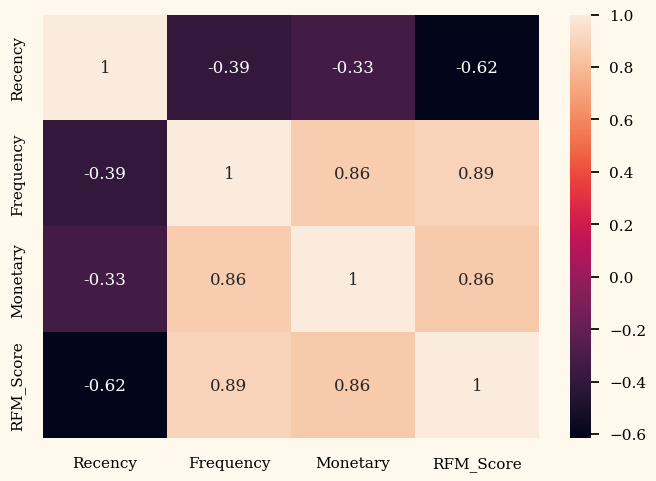

In [193]:
# we see good correlation
df_rcor = df_rfm.corr()
sns.heatmap(df_rcor,annot = True)

### How recently a product was bought

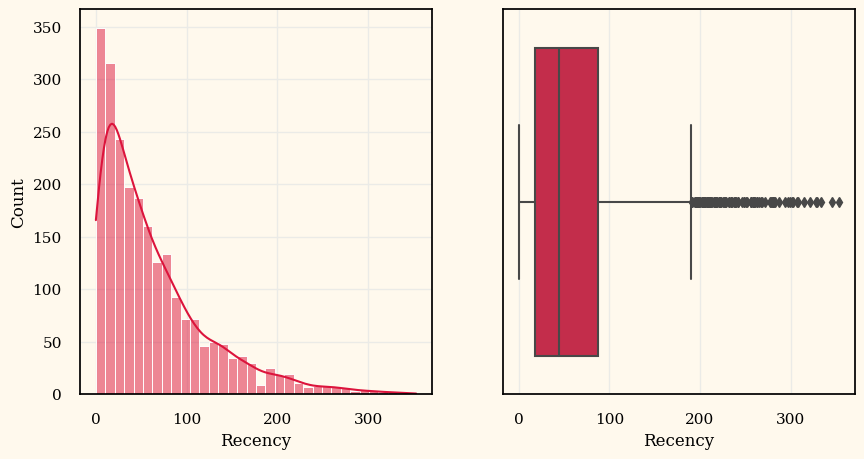

In [194]:
fig, ax = plt.subplots(1,2 , figsize=(10,5))
sns.histplot(data = df_rfm,x = 'Recency', ax=ax[0], kde = True,color = 'crimson')
sns.boxplot(data = df_rfm,x = 'Recency', ax=ax[1],color = 'crimson')

plt.show()

### Frequency of buying

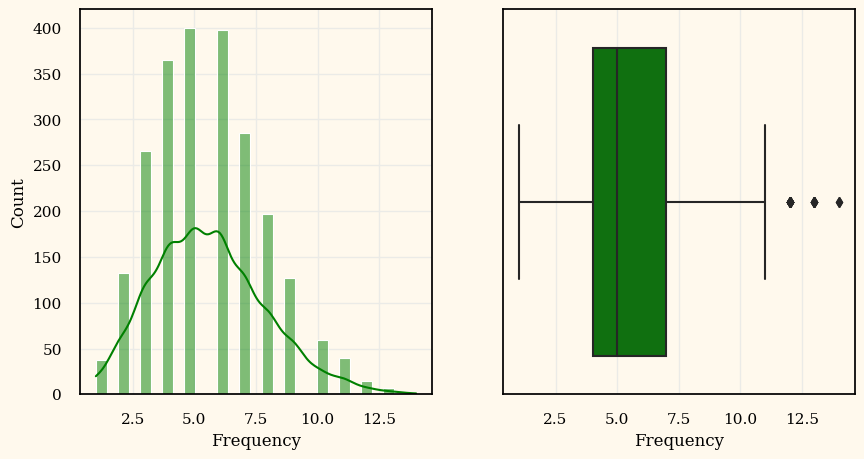

In [195]:
fig, ax = plt.subplots(1,2 , figsize=(10,5))
sns.histplot(data = df_rfm,x = 'Frequency', ax=ax[0], kde = True,color = 'green')
sns.boxplot(data = df_rfm,x = 'Frequency', ax=ax[1],color = 'green')
plt.show()

### Company income range

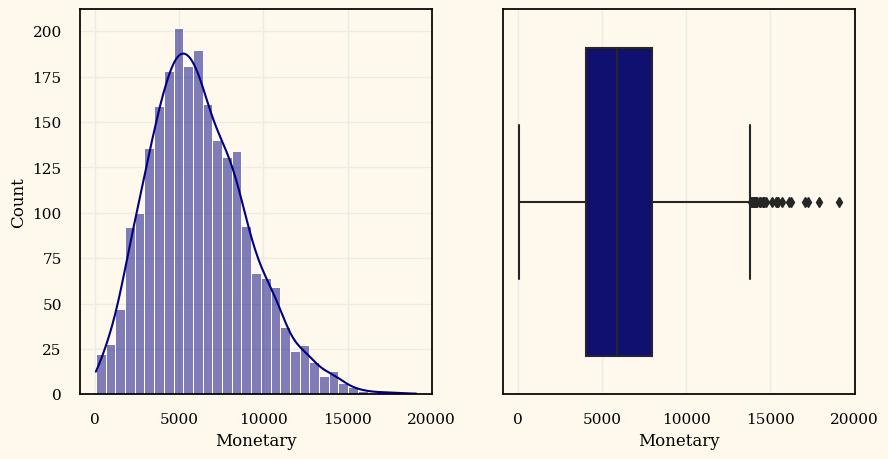

In [196]:
fig, ax = plt.subplots(1,2 , figsize=(10,5))
sns.histplot(data = df_rfm,x = 'Monetary', ax=ax[0], kde = True, color='navy')
sns.boxplot(data = df_rfm,x = 'Monetary', ax=ax[1],color = 'navy')
plt.show()

<div class="alert alert-block alert-info">

### Some inferences from the plots : <br>
- It can be seen that 50% of the customers have purchased products very recently i.e., within 50 days or 1.5 months. Also 75% of the customers have purchased within 100 days or almost 3 months.
- Half of the customers have bought at least a total of 5 items till their last purchase and 75% of the customers bought 7 items at least within the given timeframe.
- From the monetary point of view , half of the customer spendings are around 6000 Australian Dollars. while 75% of them are buying products with a total worth of 8000 AUD.

### Another interesting insight from the Monetary graph:<br>
We have seen 75% of the customers are spending total worth of 8000 AUD as I have already mentioned, but from the 80% mark onwards the last 20% of the customers are the highest spenders or high value customers as we can see they are spending more than 10K AUD to 20K AUD which is a huge sum of money and a great source of profit for the company <b>Sprocket Central Pvt. Ltd.</b> Which is also true for any kind of business and hence there is a business saying that "80% of your business comes from 20% of your customers" which is indeed true and we can also confirm for Sprocket.
</div>

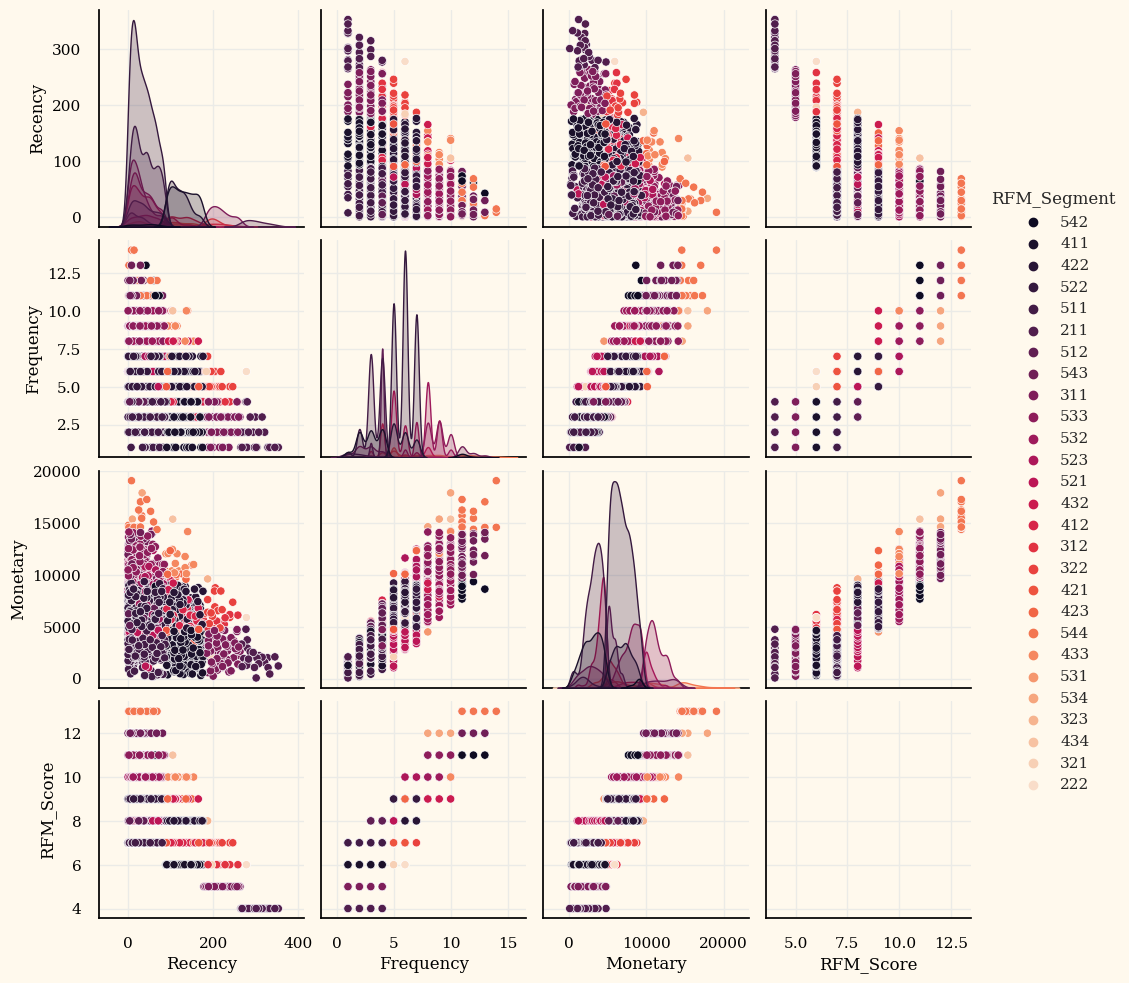

In [197]:

sns.pairplot(df_rfm,hue = 'RFM_Segment',palette = 'rocket')
plt.show()

<div class="alert alert-block alert-info">
</div>

# <font color = navy>Customer Segmentation: </font>

Now that we have sucessfully converted our customer dataset into a meaningful format, we can now easily segregate the customers based on their RFM scores and perform targeted marketing group by group.<br>

Customer segmentation needs labelling and we already have it now we need to form groups for these customers. 
I have created 4 major groupings for these customers based on their behavioral patterns which is described as follows: <br>

- <b><font color = navy>Best Customers:</font></b>
    - These customers are good spenders , more frequent and did their last purchase very recently. So, if thats clear lets see what it means for RFM Segmentation. so very recent means high score of Recency or R so giving it a range of 4 - 5. high frequency means again 4 - 5 Frequency or F score. Lastly good monetary spending or M should be 4 - 5 as well. An Example for this kind of customer in terms of RFM should be , RFM Segment = 555 , 545, 544 etc., and RFM Score should be sum of the numbers i.e., = 15,14,13 respectively.
- <b><font color = navy>High Spending Customers:</font></b>
    - As the name suggests this segment is fully focussed on amount of money spent. So those customers irrespective of new and old who bought products worth of high value and also irrespective of the frequency are targeted here in this segment. In terms of RFM segmentation , irrespective of RF values M should be 5. For example 445, 325 etc.
- <b><font color = navy>Low Spending Active Loyal Customers:</font></b>
    - This customer segment is about Loyal customers and active customers but they don't spend much, RFM segmentation could be anything between 551 to 553 etc., and their RFM score would be 11 and 13 respectively. 
- <b><font color = navy>Churned Best Customers</font></b>
    - Same as the 1st segment , but these customers have stopped buying any products as their recency score is the lowest and can be considered churned. Any RFM segment between 155 to 144 should be considered in this segment.


<b>The above mentioned groupes are what Sprocket needs to target in order to maintain and imporve its customer base.</b> <br>
### <b><font color = navy>Business Suggestions:</font></b> <br>
1. 'Best Customers' are those who are both loyal and good spenders so they generate huge amount of revenue. So focussing on how to keep them happy should be the top priority. And further analysing the behaviours of this customer segment a more personalised messageing or advertising could be done.Communicating with this customer base should make them feel valued and acknowledged.<br>
2. 'High Spending Customers' can be new and old customers for new high spenders there should be a careful incubation. Just like the previous group these set of customers should also be communicated in such a way that they feel valued and appreciated. It could be beneficial for Sprocket to give them various incentives so that they can continue their interaction with the brands and the company for more transactions. <br>
3. 'Low Spending Active Loyal Customers' is also a very different and interesting customer group. They are active and loyal but are low spenders, so , marketers should make them feel valued and incentivise them and recommend them relatable products so that their spending levels can be increased. Another marketing strategy for this group could be "spread the word/product/company and get interesting offers on your next purchase" etc.<br>
4. 'Churned Best Customers' Same as cluster 1 these are also valuable customers but they have churned as their last purchase date was long ago. Since these are also high value customers , it's worth a try for targeted marketing here. They can be communicated suggesting a particular group of products with good incentives in such a way that they return, in other words customer retention could be significant.<br>

<div class="alert alert-block alert-info">
</div>